Title: The prediction of the knowledge of users (UNS) by their degree of study time for goal object materials (STG), their degree of study time for related object with goal objects (STR) and their degree of reptition number for goal object materials (SCG).

Introduction

We are trying to set up a model that answers the predictive question of whether the category of the knowledge level of users (UNS) could be predicted by three variables, user's degree of study time for goal object materials (STG), their degree of study time for related object with goal objects (STR) and their degree of reptition number for goal object materials (SCG) (all three of which are continuous data). We would do this by running classification analysis for the four variables using the k-nearest neighbour algorithm. This would be significant since it could possibly show how the input of study time and repetitive work possibly translates to the output of greater knowledge level. We could also observe if this relationship is linear or that marginal returns diminish. All of the variables are from the dataset "modeling_data_xlsx".


Terminology

- Response variable:
   -  UNS: Categorical variable, represents the knowledge level of the users.

- Predictive variables:
    - STG: Continous variable, the degree of study time for goal object materials
    - SCG: Continous variable, the degree of repetition number of user for goal object materials.
    - STR: Continous variable, the degree of study time of user for related objects with the goal object

Preliminary exploratory data analysis below

In [16]:
#loading packages
library(tidyverse)
library(repr)
library(readxl)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [17]:
#reading the data
modeling_data <- read_excel("modeling_data_xlsx.xlsx")
modeling_data 

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


In [3]:
#cleaning the data
modeling_data_selected <- select(modeling_data, STG, SCG, STR, UNS)
modeling_data_selected

STG,SCG,STR,UNS
<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,very_low
0.08,0.08,0.10,High
0.06,0.06,0.05,Low
⋮,⋮,⋮,⋮
0.54,0.82,0.71,High
0.50,0.75,0.81,Middle
0.66,0.90,0.76,High


In [4]:
#summarize the data (number of observations)
nrow(modeling_data_selected)

[1] 258

In [5]:
#summarize the data (mean)
modeling_data_summarize <- summarize(modeling_data_selected, 
                                     mean_STG = mean(STG),
                                    mean_SCG = mean(SCG),
                                     mean_STR = mean(STR))
modeling_data_summarize

mean_STG,mean_SCG,mean_STR
<dbl>,<dbl>,<dbl>
0.3711473,0.3556744,0.4680039


In [6]:
#summarize the data (min, max)
modeling_data_summarize <- summarize(modeling_data_selected, 
                                     min_STG = min(STG),
                                    min_SCG = min(SCG),
                                     min_STR = min(STR),
                                    max_STG = max(STG),
                                    max_SCG = max(SCG),
                                     max_STR = max(STR),
                                    )
modeling_data_summarize

min_STG,min_SCG,min_STR,max_STG,max_SCG,max_STR
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0.99,0.9,0.95


In [7]:
#summarize the data (standard deviation)
modeling_data_summarize <- summarize(modeling_data_selected, 
                                     sd_STG = sd(STG),
                                    sd_SCG = sd(SCG),
                                     sd_STR = sd(STR)
                                    )
modeling_data_summarize

sd_STG,sd_SCG,sd_STR
<dbl>,<dbl>,<dbl>
0.2102712,0.2119623,0.2459398


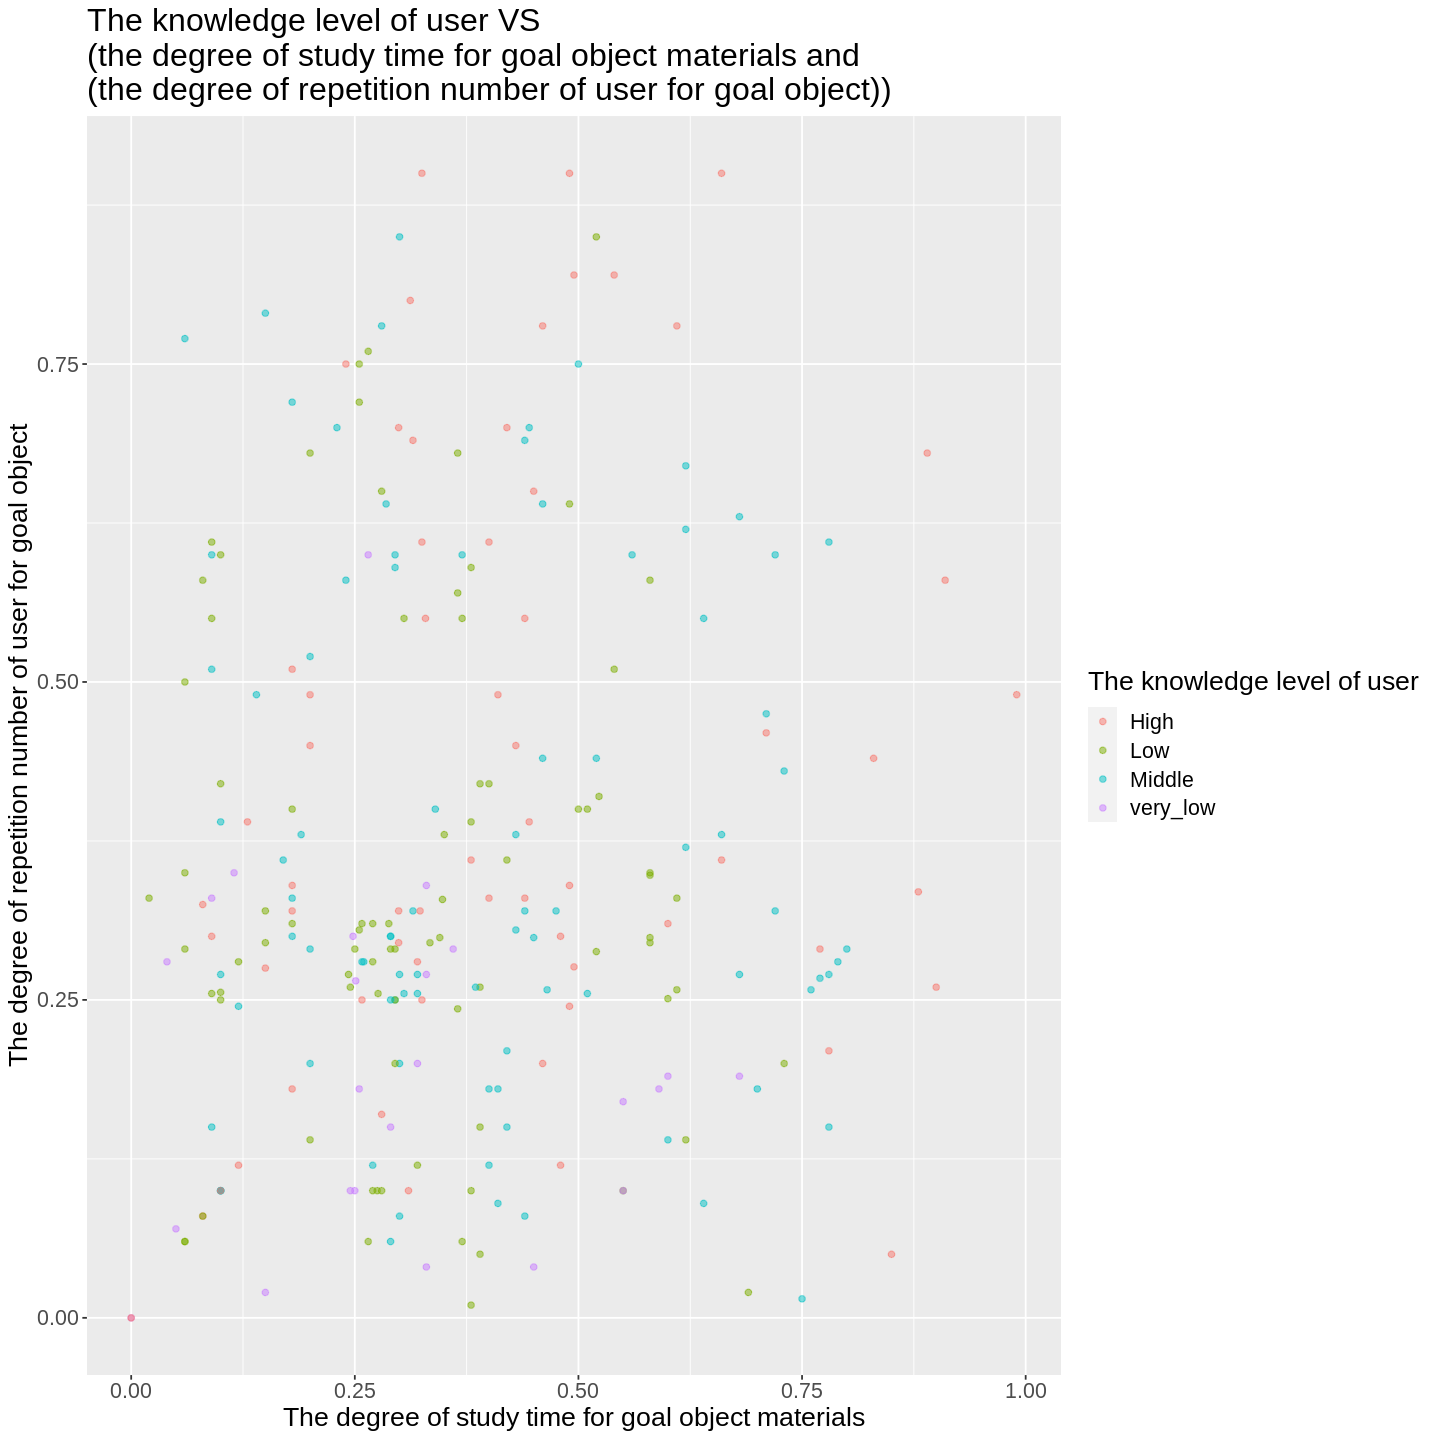

In [8]:
#visualising the data of UNS vs STG and SCG
options(repr.plot.width = 12, repr.plot.height = 12)

modeling_data_plot <- ggplot(modeling_data_selected, aes(x = STG, y = SCG, colour = UNS)) +
        geom_point(alpha = 0.5) +
        labs(x = "The degree of study time for goal object materials", y = "The degree of repetition number of user for goal object" , colour = "The knowledge level of user") +
        ggtitle("The knowledge level of user VS \n(the degree of study time for goal object materials and \n(the degree of repetition number of user for goal object))") +
        theme(text = element_text(size = 16))

modeling_data_plot

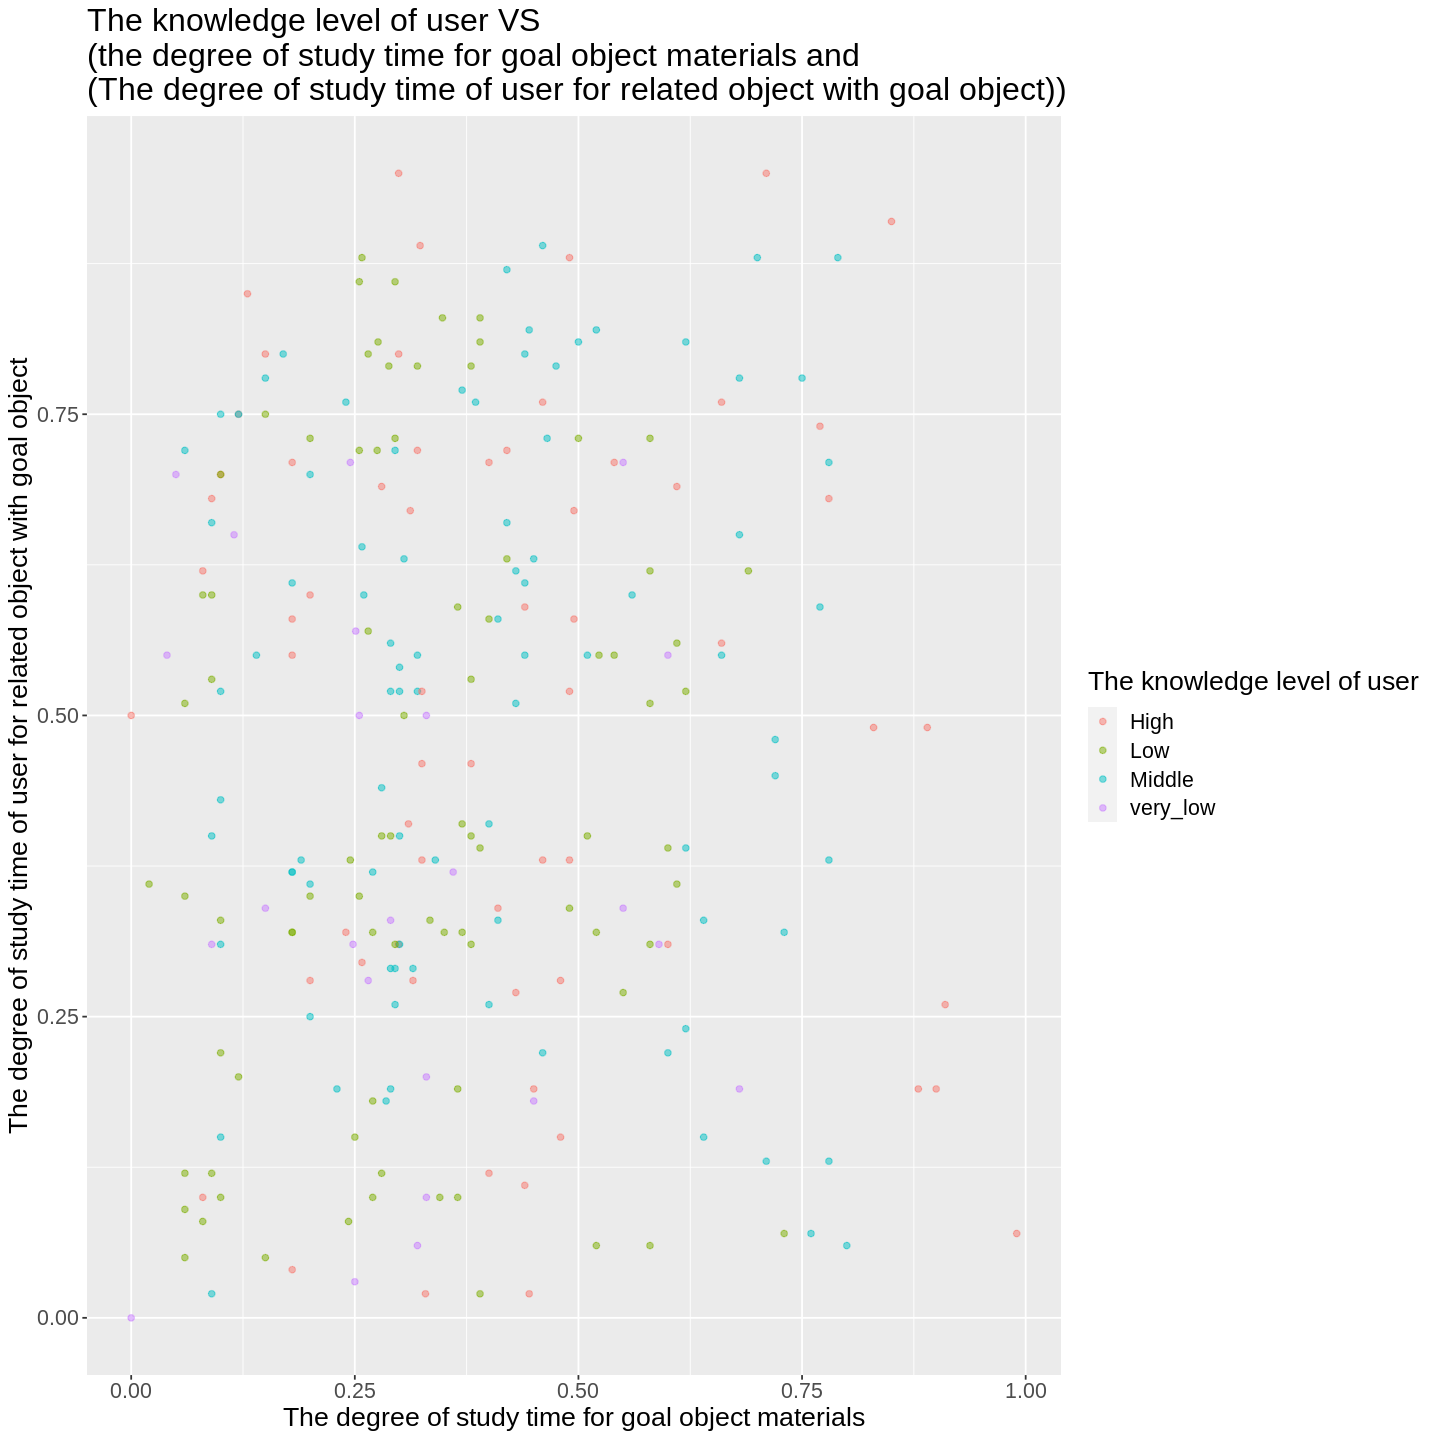

In [9]:
#visualising the data of UNS vs STG and STR
options(repr.plot.width = 12, repr.plot.height = 12)

modeling_data_plot <- ggplot(modeling_data_selected, aes(x = STG, y = STR, colour = UNS)) +
        geom_point(alpha = 0.5) +
        labs(x = "The degree of study time for goal object materials", y = "The degree of study time of user for related object with goal object" , colour = "The knowledge level of user") +
        ggtitle("The knowledge level of user VS \n(the degree of study time for goal object materials and \n(The degree of study time of user for related object with goal object))") +
        theme(text = element_text(size = 16))

modeling_data_plot

In [10]:
#splitting into training and testing data
set.seed(1)

modeling_split <- initial_split(modeling_data_selected, prop = 0.75, strata = UNS) 
modeling_training <- training(modeling_split) 
modeling_testing <- testing(modeling_split)

modeling_split
modeling_training
modeling_testing

<Training/Testing/Total>
<192/66/258>

STG,SCG,STR,UNS
<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,very_low
0.08,0.08,0.10,High
0.12,0.12,0.75,High
⋮,⋮,⋮,⋮
0.56,0.60,0.60,Middle
0.78,0.61,0.71,Middle
0.50,0.75,0.81,Middle


STG,SCG,STR,UNS
<dbl>,<dbl>,<dbl>,<chr>
0.10,0.10,0.43,Middle
0.00,0.00,0.50,High
0.18,0.18,0.55,High
⋮,⋮,⋮,⋮
0.52,0.44,0.82,Middle
0.62,0.62,0.24,Middle
0.91,0.58,0.26,High


In [11]:
#create recipe for training data, a specification for k

set.seed(1)
modeling_recipe <- recipe(UNS ~ STG + SCG + STR, data = modeling_training) |> 
step_scale(all_predictors()) |>
step_center(all_predictors())

modeling_recipe



Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [ ]:
modeling_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
set_engine("kknn") |> 
set_mode("classification")

modeling_spec

In [ ]:
#5-fold cross-validation, choose the number of neighbors via the maximum accuracy:
set.seed(1)
modeling_vfold <- vfold_cv(modeling_training, v = 5, strata = UNS) 
modeling_vals <- tibble(neighbors = seq(1, 146, by = 5)) 

modeling_workflow <- workflow() |> 
    add_recipe(modeling_recipe) |> 
    add_model(modeling_spec) |>
    tune_grid(resamples = modeling_vfold, grid = modeling_vals) |> 
    collect_metrics() 

modeling_workflow

In [ ]:
accuracies <- modeling_workflow |>
        filter(.metric == "accuracy")

accuracies

In [18]:
#Choose the optimal K to run the full analyis on test
modeling_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = modeling_k) |>
        set_engine("kknn") |> 
        set_mode("classification")

modeling_workflow_fit <- workflow() |> 
add_recipe(modeling_recipe) |>
add_model(modeling_spec_2) |> 
fit(data = modeling_training)

modeling_workflow_fit

ERROR: Error in FUN(X[[i]], ...): object 'modeling_k' not found


In [ ]:
modeling_predict <- modeling_workflow_fit |> 
        predict(modeling_testing) |> 
        bind_cols(modeling_testing)|>
        select.estimate) |>
        pull()

modeling_mericts <- metrics(modeling_predict, truth = UNS, estimate = .pred_class) |> 
    filter(.metric == 'accuracy')

knn_mult_mets

Methods

We will use the publicly available data "modeling_data_xlsx" on studying and knowledge level from the University of California. We selected the variables STG, SCG, STR, and UNS. In particular, the predictors would be STG, SCG, and STR, all continous, while the response variable would be the categorical variable UNS. We are going to split the data into training set and testing set with the ratio 3:1 on random, and carry out classification analysis using the k-nearest neighbours algorithm, with 5-fold cross-validation on the training set. We will pick the optimal k-value with the highest accuracy, and carry out predictions on UNS on the testing set. We will then re-evaluate the accuracy of our prediction model by computing its prediction accuracy (calculated by dividing the number of correct predictons by the total number of predictions), we would also show its confusion matrix to further evaluate its usefulness, and determine if the three independent variables are strong predictors of UNS.

Expected outcomes and significance

#What do you expect to find?

#What impact could such findings have?

#What future questions could this lead to?
